In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import textwrap

import torch
from torchvision import transforms
from torch.utils.data import DataLoader

from datasets.cityscapes import Cityscapes
from utils import get_image_labels, important_classes

In [2]:
root = os.getcwd()

# Path to your cityscapes dataset folder
data_path = os.path.join(root, 'cityscapes')

In [3]:
data_transforms = transforms.Compose([transforms.ToTensor()])

PIl_transform = transforms.Compose([transforms.ToPILImage()])

In [4]:
# List of perturbations you'd like to apply to your images
# Must include 'none'
# Can include any of the following: fog, rain, snow, occlusion

perturbations = ['none', 'fog', 'rain', 'snow', 'occlusion']

In [5]:
# Dataset dictionary indexed by the 
# type of perturbation it applies to images
datasets = {i: Cityscapes(data_path,
                               split='train',
                               mode='coarse',
                               target_type=['polygon'],
                               transform=data_transforms,
                               target_transform=get_image_labels,
                               perturbation=i)
                 for i in perturbations}

In [6]:
def test_weather_generation(num_imgs, perturbs, datasets):
    """
    Applies and displays the given perturbations on a given number of random images 
    from the given PyTorch datasets
    
    Number of given datasets must match the given number of perturbations, where 
    each dataset applies a different perturbation
    """
    
    # Create subplot layout and adjust vertical spacing
    fig, axs = plt.subplots(len(perturbs), num_imgs, figsize=(15,15))
    plt.subplots_adjust(hspace = 0.6)
    
    dataset_len = datasets['none'].__len__()
    
    for n in range(num_imgs):
        # Choose a random image
        idx = np.random.randint(0, dataset_len)
        
        # Apply and display each perturbation
        for p, perturb in enumerate(perturbs):
            image, labels = datasets[perturb][idx]
            
            
            image = image.cpu().numpy().transpose((1,2,0))
            labels = labels.squeeze()
            
            # Create list of labels from one-hot tensor
            label_list = []
            for i in range(labels.size(0)):
                if labels[i] == 1:
                    label_list.append(important_classes[i])
                    
            ax = axs[p, n]
            ax.set_title('Perturbation: {}\nLabels: {}'.format(
                                        perturb, 
                                        textwrap.fill(', '.join(label_list), 40)))
            ax.axis('off')
            ax.imshow(image)

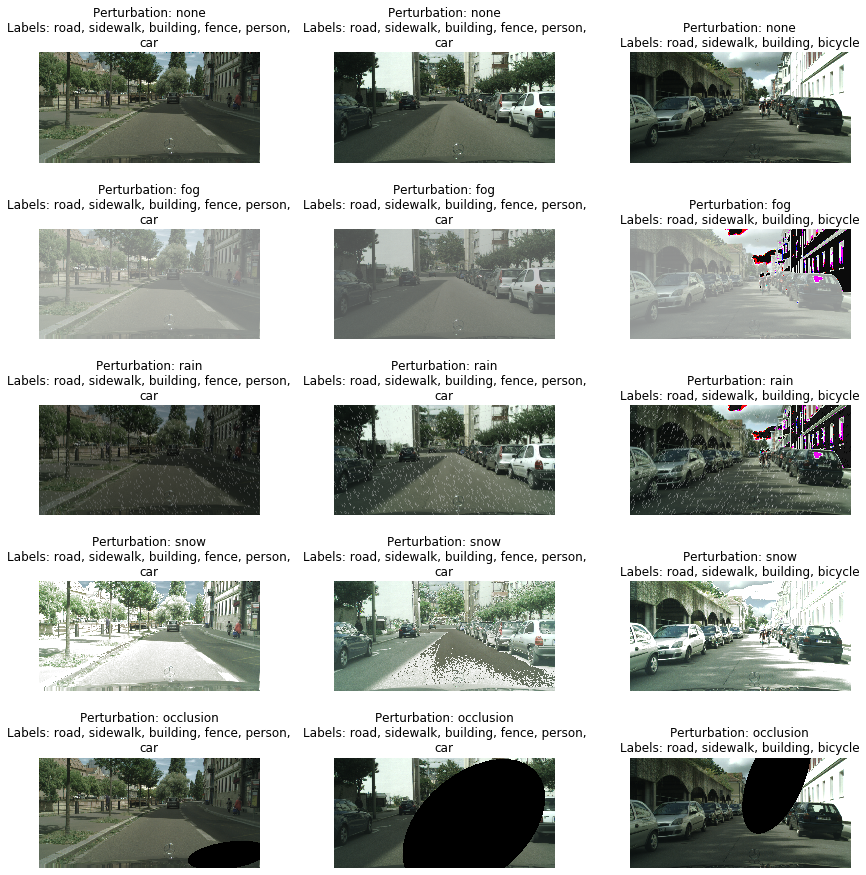

In [7]:
test_weather_generation(3, perturbations, datasets)

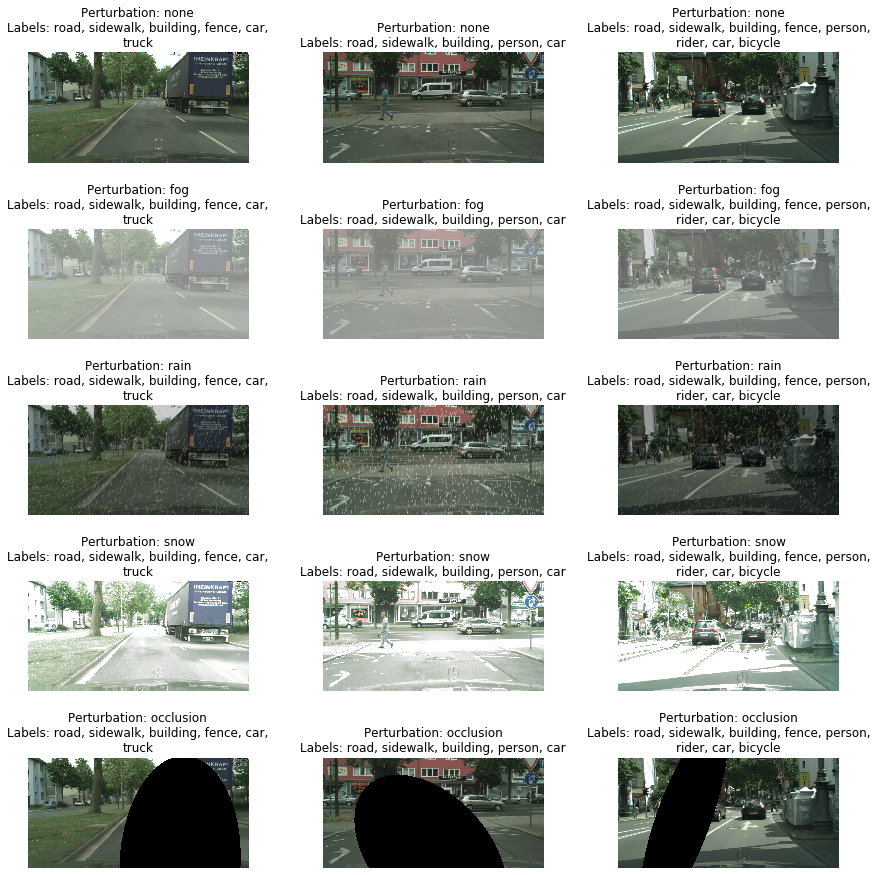

In [8]:
test_weather_generation(3, perturbations, datasets)

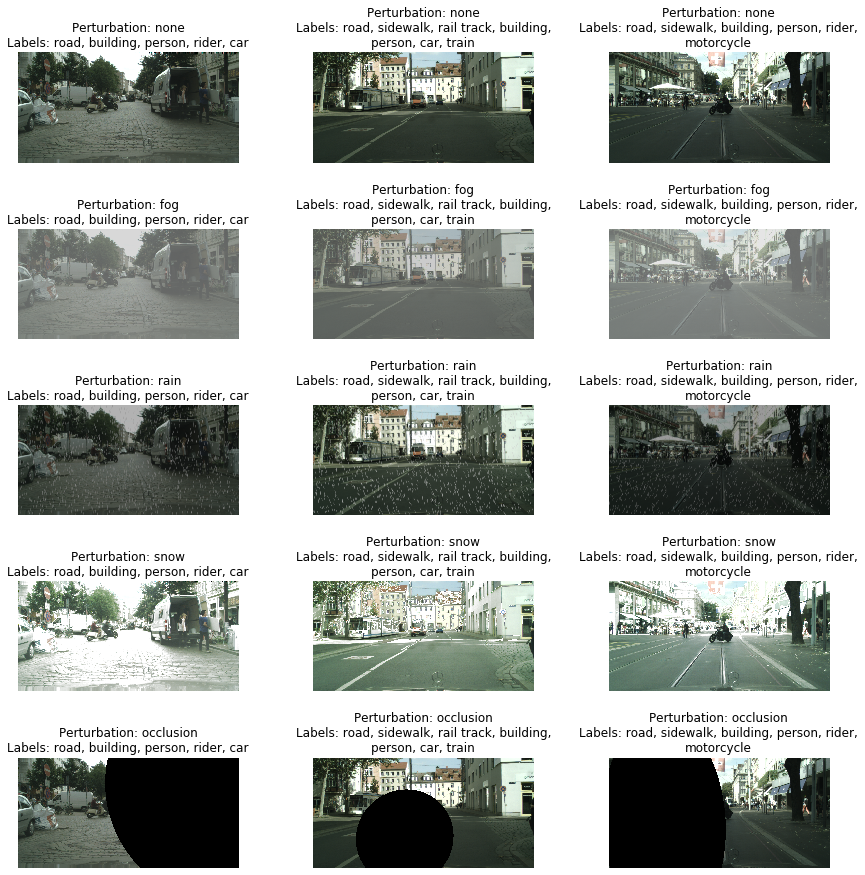

In [9]:
test_weather_generation(3, perturbations, datasets)